In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Code generated by Perplexity.ai

https://www.perplexity.ai/search/write-python-code-to-produce-t-v3sgL3OxQBCnQMo6rSLndw

https://www.perplexity.ai/search/great-can-you-change-the-code-yNEl7XyHREKGAndwt1LuIg 



In [ ]:
# FitzHugh-Nagumo model equations
def fhn(t, z, a, b, epsilon, I):
    v, w = z
    dvdt = v - (v**3) / 3 - w + I
    dwdt = epsilon * (v + a - b * w)
    return [dvdt, dwdt]

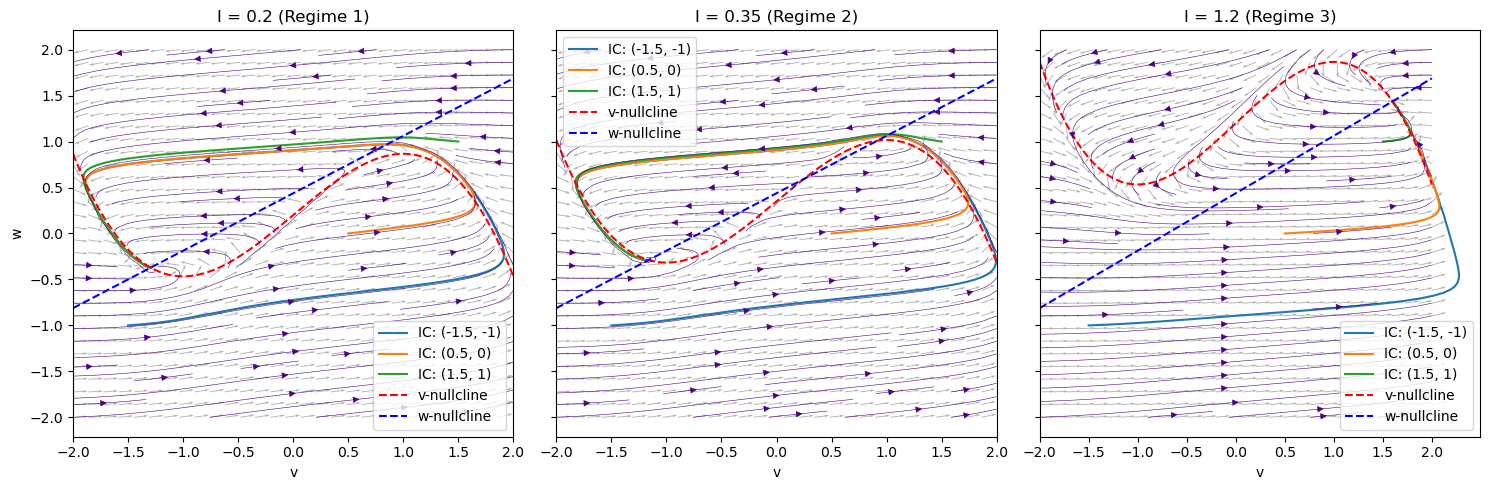

In [15]:
# Parameters
a = 0.7
b = 1.6
epsilon = 0.08

# Bifurcation parameter values for different regimes
I_values = [0.2, 0.35, 1.2]  # Monostable, Bistable, Oscillatory

# Time span for integration
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Initial conditions for phase space trajectories
initial_conditions = [
    (-1.5, -1), (0.5, 0), (1.5, 1)  # Different starting points in phase space
]

# Plot phase space diagrams for each regime
fig, axes = plt.subplots(1, len(I_values), figsize=(15, 5), sharey=True)

for i, I in enumerate(I_values):
    ax = axes[i]
    
    # Solve the system for each initial condition
    for z0 in initial_conditions:
        sol = solve_ivp(fhn, t_span, z0, args=(a, b, epsilon, I), t_eval=t_eval)
        v_vals, w_vals = sol.y
        ax.plot(v_vals, w_vals, label=f"IC: {z0}")
    
    # Plot nullclines for better visualization of fixed points
    v = np.linspace(-2, 2, 500)
    w_nullcline = v - (v**3) / 3 + I  # dv/dt = 0 nullcline
    v_nullcline = (v + a) / b         # dw/dt = 0 nullcline
    
    ax.plot(v, w_nullcline, 'r--', label="v-nullcline")
    ax.plot(v, v_nullcline, 'b--', label="w-nullcline")
    
    # Create vector field
    v_mesh, w_mesh = np.meshgrid(np.linspace(-2, 2, 30), np.linspace(-2, 2, 30))
    dv = v_mesh - (v_mesh**3) / 3 - w_mesh + I
    dw = epsilon * (v_mesh + a - b * w_mesh)
    
    # Normalize vectors for better visualization
    magnitude = np.sqrt(dv**2 + dw**2)
    dv = dv / magnitude
    dw = dw / magnitude
    
    # Plot vector field
    ax.quiver(v_mesh, w_mesh, dv, dw, color='gray', alpha=0.6, scale=30, width=0.002)
    ax.streamplot(v_mesh, w_mesh, dv, dw, color='indigo',  linewidth=0.4, density=1)

    # Set plot labels and title
    ax.set_title(f"I = {I} (Regime {i+1})")
    ax.set_xlabel("v")
    if i == 0:
        ax.set_ylabel("w")
    ax.legend()

plt.tight_layout()
plt.show()
